<a href="https://colab.research.google.com/github/marshaadp/DEP-BIN-PROJECT/blob/main/KNN_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. K- NEARST NEIGHBOR (KNN) CLASSIFICATION**

Tujuan :
1. Memprediksi apakah siswa akan mendapatkan nilai akhir (G1, G2, G3) yang TINGGI atau RENDAH bedasarkan kelompok data variabel independen.

2. Mengklasifikasikan siswa berdasarkan gaya hidup dan aktivitas sosial mereka untuk mengidentifikasi pola-pola yang berkaitan dengan prestasi akademik.

IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, mean_absolute_error
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error

LOAD DATA

In [ ]:
df = pd.read_csv('mat2.csv')

COLLECTING DATA

In [ ]:
print(df.head())  # show the first few rows of the data

   Unnamed: 0 school sex  age address famsize Pstatus  Medu  Fedu     Mjob  \
0           0     GP   F   18       U     GT3       A     4     4  at_home   
1           1     GP   F   17       U     GT3       T     1     1  at_home   
2           2     GP   F   15       U     LE3       T     1     1  at_home   
3           3     GP   F   15       U     GT3       T     4     2   health   
4           4     GP   F   16       U     GT3       T     3     3    other   

   ... famrel freetime goout  Dalc  Walc  health absences  G1  G2  G3  
0  ...      4        3     4     1     1       3        6   5   6   6  
1  ...      5        3     3     1     1       3        4   5   5   6  
2  ...      4        3     2     2     3       3       10   7   8  10  
3  ...      3        2     2     1     1       5        2  15  14  15  
4  ...      4        3     2     1     2       5        4   6  10  10  

[5 rows x 34 columns]


Visualizing distribution of data

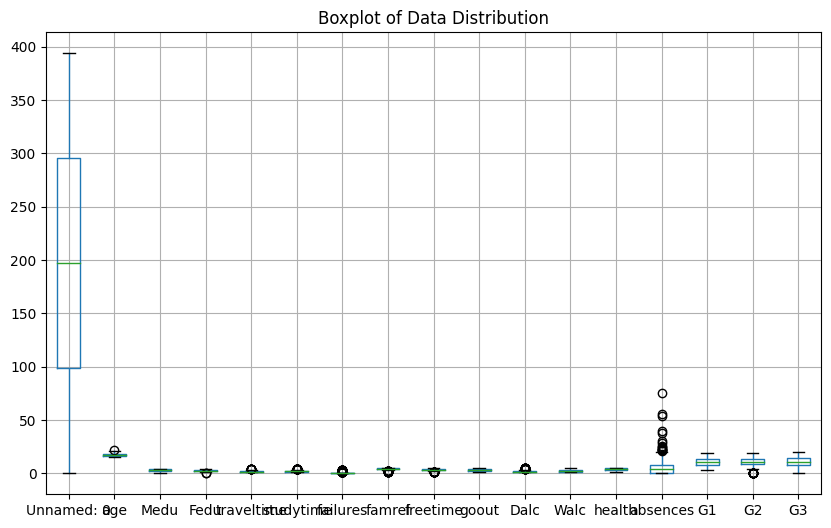

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot of Data Distribution')
plt.show()

PENGECEKAN DATA KOSONG

In [ ]:
print(df.eq(0).sum())

Unnamed: 0      1
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            3
Fedu            2
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures      312
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences      115
G1              0
G2             13
G3             38
dtype: int64


 Reading and checking the structure of the data

In [ ]:
print(df.info())  # show the data types of each column
print(df.describe())  # show summary statistics of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  395 non-null    int64 
 1   school      395 non-null    object
 2   sex         395 non-null    object
 3   age         395 non-null    int64 
 4   address     395 non-null    object
 5   famsize     395 non-null    object
 6   Pstatus     395 non-null    object
 7   Medu        395 non-null    int64 
 8   Fedu        395 non-null    int64 
 9   Mjob        395 non-null    object
 10  Fjob        395 non-null    object
 11  reason      395 non-null    object
 12  guardian    395 non-null    object
 13  traveltime  395 non-null    int64 
 14  studytime   395 non-null    int64 
 15  failures    395 non-null    int64 
 16  schoolsup   395 non-null    object
 17  famsup      395 non-null    object
 18  paid        395 non-null    object
 19  activities  395 non-null    object
 20  nursery   

 Convert categorical variables to numerical variables

In [ ]:
df['school'] = df['school'].map({'GP': 0, 'MS': 1}).astype(int)
df['sex'] = df['sex'].map({'F': 0, 'M': 1}).astype(int)
df['address'] = df['address'].map({'U': 0, 'R': 1}).astype(int)
df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1}).astype(int)
df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A': 1}).astype(int)
df['Mjob'] = df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}).astype(int)
df['Fjob'] = df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}).astype(int)
df['reason'] = df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3}).astype(int)
df['guardian'] = df['guardian'].map({'mother': 0, 'father': 1, 'other': 2}).astype(int)
df['schoolsup'] = df['schoolsup'].map({'no' : 0, 'yes' : 1}).astype(int)
df['famsup'] = df['famsup'].map({'no' : 0, 'yes' : 1}).astype(int)
df['paid'] = df['paid'].map({'no' : 0, 'yes' : 1}).astype(int)
df['activities'] = df['activities'].map({'no' : 0, 'yes' : 1}).astype(int)
df['higher'] = df['higher'].map({'no' : 0, 'yes' : 1}).astype(int)
df['nursery'] = df['nursery'].map({'no' : 0, 'yes' : 1}).astype(int)
df['internet'] = df['internet'].map({'no' : 0, 'yes' : 1}).astype(int)
df['romantic'] = df['romantic'].map({'no' : 0, 'yes' : 1}).astype(int)

Normalization

In [ ]:
scaler = MinMaxScaler()
df[['school','sex','age','address','famsize','Pstatus', 'Medu', 'Fedu','Mjob','Fjob','reason','guardian','traveltime', 'studytime', 'failures', 'schoolsup','famsup', 'paid','activities','higher','internet','romantic','famrel', 'freetime', 'goout','Dalc', 'Walc', 'health', 'absences','G1', 'G2', 'G3']] = scaler.fit_transform(df[['school','sex','age','address','famsize','Pstatus', 'Medu', 'Fedu','Mjob','Fjob','reason','guardian','traveltime', 'studytime', 'failures', 'schoolsup','famsup','paid','activities','higher','internet','romantic','famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences','G1', 'G2', 'G3']])
print(df)

     Unnamed: 0  school  sex       age  address  famsize  Pstatus  Medu  Fedu  \
0             0     0.0  0.0  0.428571      0.0      1.0      1.0  1.00  1.00   
1             1     0.0  0.0  0.285714      0.0      1.0      0.0  0.25  0.25   
2             2     0.0  0.0  0.000000      0.0      0.0      0.0  0.25  0.25   
3             3     0.0  0.0  0.000000      0.0      1.0      0.0  1.00  0.50   
4             4     0.0  0.0  0.142857      0.0      1.0      0.0  0.75  0.75   
..          ...     ...  ...       ...      ...      ...      ...   ...   ...   
390         390     1.0  1.0  0.714286      0.0      0.0      1.0  0.50  0.50   
391         391     1.0  1.0  0.285714      0.0      0.0      0.0  0.75  0.25   
392         392     1.0  1.0  0.857143      1.0      1.0      0.0  0.25  0.25   
393         393     1.0  1.0  0.428571      1.0      0.0      0.0  0.75  0.50   
394         394     1.0  1.0  0.571429      0.0      0.0      0.0  0.25  0.25   

     Mjob  ...  famrel  fre

Mengatur data frame

Langkah selanjutnya adalah mendefinisikan fitur (X) dan target (y) dari dataset.

In [ ]:
X = df.drop('G3', axis=1)
y = df['G3']
print(df.info())  # show the data types of each column
print(df.describe())  # show summary statistics of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  395 non-null    int64  
 1   school      395 non-null    float64
 2   sex         395 non-null    float64
 3   age         395 non-null    float64
 4   address     395 non-null    float64
 5   famsize     395 non-null    float64
 6   Pstatus     395 non-null    float64
 7   Medu        395 non-null    float64
 8   Fedu        395 non-null    float64
 9   Mjob        395 non-null    float64
 10  Fjob        395 non-null    float64
 11  reason      395 non-null    float64
 12  guardian    395 non-null    float64
 13  traveltime  395 non-null    float64
 14  studytime   395 non-null    float64
 15  failures    395 non-null    float64
 16  schoolsup   395 non-null    float64
 17  famsup      395 non-null    float64
 18  paid        395 non-null    float64
 19  activities  395 non-null    f

Pembagian data training dan testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.dtypes

Unnamed: 0      int64
school        float64
sex           float64
age           float64
address       float64
famsize       float64
Pstatus       float64
Medu          float64
Fedu          float64
Mjob          float64
Fjob          float64
reason        float64
guardian      float64
traveltime    float64
studytime     float64
failures      float64
schoolsup     float64
famsup        float64
paid          float64
activities    float64
nursery         int64
higher        float64
internet      float64
romantic      float64
famrel        float64
freetime      float64
goout         float64
Dalc          float64
Walc          float64
health        float64
absences      float64
G1            float64
G2            float64
dtype: object

Skala Fitur: Fitur-fitur dinormalisasi menggunakan StandardScaler untuk menghasilkan distribusi yang memiliki rata-rata 0 dan varians 1.

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[-0.18905039 -0.34722813  1.07906606 ... -0.46440769  0.33205033
   0.62616324]
 [-0.07141649 -0.34722813  1.07906606 ... -0.70225668  0.64340909
   0.89283114]
 [-0.26144048 -0.34722813 -0.92672732 ... -0.70225668 -0.91338472
  -0.97384417]
 ...
 [ 0.61628938 -0.34722813 -0.92672732 ...  1.08161077 -0.60202596
  -0.44050837]
 [ 1.32209277 -0.34722813 -0.92672732 ... -0.70225668  0.64340909
   1.15949904]
 [-0.90390255 -0.34722813  1.07906606 ... -0.22655869 -0.2906672
   0.62616324]]
[[-1.12107282 -0.34722813  1.07906606 ... -0.46440769 -0.91338472
  -0.70717627]
 [ 1.53021429  2.87995098  1.07906606 ... -0.34548319  0.95476785
   0.35949533]
 [ 0.41721663 -0.34722813  1.07906606 ...  0.24913929 -2.47017853
  -1.50717997]
 ...
 [-0.79531741 -0.34722813  1.07906606 ...  0.24913929 -0.60202596
  -0.44050837]
 [-1.79972993 -0.34722813 -0.92672732 ... -0.46440769  1.26612661
   0.89283114]
 [-1.66399851 -0.34722813  1.07906606 ...  1.20053527 -1.53610225
  -1.50717997]]


Penentuan Jangkauan K: Kita menentukan jangkauan nilai k yang akan digunakan dalam model KNN.

In [ ]:
k_values = list(range(1, 31))
print(k_values)
# Initialize an empty list to store accuracy scores
scores = []

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


**Validasi Silang**: Proses cross-validation digunakan untuk mengevaluasi kinerja model KNN dengan berbagai nilai k.

In [ ]:

# Perform cross-validation for each k value
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    scores.append(score)

Visualisasi Skor: Skor negatif rata-rata kesalahan kuadrat ditampilkan dalam plot untuk setiap nilai k.


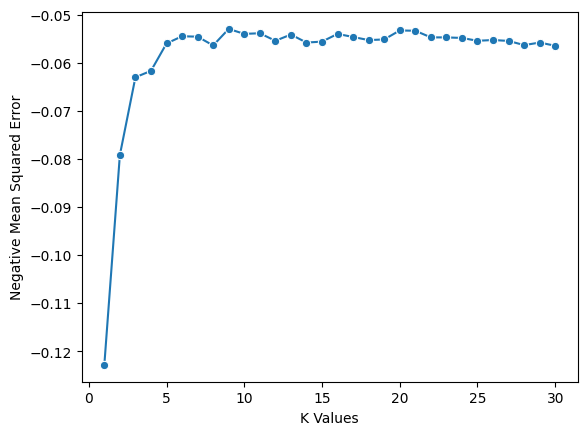

In [ ]:
# Plot the accuracy scores for each k value
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Negative Mean Squared Error")
plt.show()


Pemilihan K Terbaik: Nilai k dengan skor negatif rata-rata kesalahan kuadrat terendah dipilih sebagai k terbaik.

In [ ]:
# Find the best k value
best_index = np.argmin(scores)
best_k = k_values[best_index]
print(f"The best k value is {best_k} with a negative mean squared error of {scores[best_index]}")

The best k value is 1 with a negative mean squared error of -0.12281012658227848


Pelatihan Model: Model KNN dilatih menggunakan k terbaik pada set pelatihan.

In [ ]:
# Train a KNeighborsRegressor model with the best k value
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

Evaluasi Model: Kinerja model dievaluasi pada set pengujian menggunakan mean_squared_error.

In [ ]:
# Evaluate the model on the test set
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test set negative mean squared error: {mse}")

Test set negative mean squared error: 0.04629746835443039
